# Reddit

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [16]:
# !pip install PyTorch
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# or 
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse
# from google.colab import auth
# auth.authenticate_user()
# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()
# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
# %cd /content
# !mkdir drive
# %cd drive
# !mkdir MyDrive
# %cd ..
# %cd ..
# !google-drive-ocamlfuse /content/drive/MyDrive

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [3]:
# for local:
Filtered_OP_and_Comments = pd.read_excel (r'/Users/muzheguo/Desktop/GWU/Group/MyPaper/fda_intern/data/Reddit NLP Project Dataset.xlsx', sheet_name = 'Filtered NVIVO OP and comments')
Filtered_Authors_Classification = pd.read_excel (r'/Users/muzheguo/Desktop/GWU/Group/MyPaper/fda_intern/data/Reddit NLP Project Dataset.xlsx', sheet_name = 'Filtered Authors Classification')
# for colab:
# Filtered_OP_and_Comments = pd.read_excel (r'/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/data/Reddit NLP Project Dataset.xlsx', sheet_name = 'Filtered NVIVO OP and comments')
# Filtered_Authors_Classification = pd.read_excel (r'/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/data/Reddit NLP Project Dataset.xlsx', sheet_name = 'Filtered Authors Classification')

In [12]:
print('there are %d comments'%(Filtered_OP_and_Comments.shape[0]))
Filtered_OP_and_Comments.head(3)

there are 31337 comments


,author,date,number of responses,link,body,title,flair,concat
0,2000-06-10 00:00:00,2020-05-02 17:35:08,0,/r/COVID19positive/comments/gc03vq/stabbing_pa...,stabbing pains in my stomach and chest. you ar...,comment,comment,comment\n\nstabbing pains in my stomach and ch...
1,2000-06-10 00:00:00,2020-05-04 14:47:34,0,/r/COVID19positive/comments/gd6cr8/what_were_f...,"extreme light headedness, headache, and everyt...",comment,comment,"comment\n\nextreme light headedness, headache,..."
2,2000-06-10 00:00:00,2020-05-04 14:05:42,8,/r/COVID19positive/comments/gdc7lv/covid19_has...,What can i do about this? pretty straightforwa...,covid-19 has fucked up my last grade card for ...,Tested Positive - Me,covid-19 has fucked up my last grade card for ...


In [19]:
print('there are %d authors'%(Filtered_Authors_Classification.shape[0]))
print('-----------------------------------------------------------------')
print(Filtered_Authors_Classification['Classification'].value_counts())
print('-----------------------------------------------------------------')
print(Filtered_OP_and_Comments['flair'].value_counts())
Filtered_Authors_Classification.head(5)

there are 721 authors
-----------------------------------------------------------------
Tested Positive             312
Unconfirmed/Questionable    205
Commenter Only              110
Tested Negative              85
Moderator                     8
Unassigned                    1
Name: Classification, dtype: int64
-----------------------------------------------------------------
comment                                  29711
Tested Positive - Me                       567
Question-to those who tested positive      387
Tested Positive                            200
Presumed Positive - From Doctor            162
Question-for medical research               81
Tested Positive - Family                    48
Medical Question                            29
Tested Positive - Friends                    8
Question                                     6
Presumed Positive - From Test                6
Announcement                                 5
Meta                                         5
Removed:

,Authors,Classification
0,_iwasnotmagnificent_,Tested Positive
1,_thewa_,Tested Positive
2,22maxtte44,Commenter Only
3,2804435,Unconfirmed/Questionable
4,2b613,Commenter Only


### Merge data

In [25]:
merged_data0 = Filtered_OP_and_Comments.merge(Filtered_Authors_Classification, 
                                              left_on='author', 
                                              right_on='Authors',
                                              how='inner')  #31332
merged_data0 = merged_data0[['author','date','body','title','Classification']]
merged_data =  merged_data0.dropna(axis = 0, how = 'any', inplace = False)  #remove nan value
print('there are %d comments'%(merged_data.shape[0]))
merged_data.head(3)

there are 31257 comments


,author,date,body,title,Classification
0,2804435,2020-03-29 07:39:32,That's exactly my aim yes. It's been scary but...,comment,Unconfirmed/Questionable
1,2804435,2020-03-29 09:50:12,1. Stop smoking. Now. Seriously what the hell ...,If you want to drastically improve your odds o...,Unconfirmed/Questionable
2,2804435,2020-03-29 10:10:33,Sleep sitting up. Window wide open. The room m...,comment,Unconfirmed/Questionable


In [221]:
print(merged_data['Classification'].value_counts())

Unconfirmed/Questionable    11041
Tested Positive              8282
Tested Negative              8066
Commenter Only               3309
Moderator                     558
Unassigned                      1
Name: Classification, dtype: int64


### Save positive data for symptom extraction model

In [ ]:
# import re
# positive_data = merged_data.copy()[merged_data['Classification'] == 'Tested Positive']
# positive_data[["body"]] = positive_data[["body"]].astype(str)  #convert 'body' to string 
# for i in range(len(positive_data)):
#     positive_data['body'].iloc[i] = positive_data['body'].iloc[i].replace('_x000D_',' ').replace('\r', '').replace('\n', '').replace('&amp;','&')
#     positive_data['body'].iloc[i] = re.sub(r'\<U\+[A-Za-z0-9]+\>','', positive_data['body'].iloc[i]) #remove emoji
# positive_data.to_csv('/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/positive_data.csv',encoding='utf_8_sig')

### Combine title and body, prepare labels (string to number)

In [222]:
# remove /n /r _x000D_ in body sentences, convert some body sentences with type float/time type into string  
author = merged_data.author.values
body_sentences = merged_data.body.values
title = merged_data.title.values
Classification_labels = merged_data.Classification.values

title_body_sentences = []
for i in range(len(body_sentences)):
    if type(body_sentences[i]) != str:
        body_sentences[i] = str(body_sentences[i]) 
    body_sentences[i] = body_sentences[i].replace('_x000D_',' ').replace('\r', '').replace('\n', '').replace('  ','')
    title_body_sentences.append(title[i] + ": " + body_sentences[i])
temp_data = pd.DataFrame()
temp_data['author'] = author 
temp_data['title_body_sentences'] = title_body_sentences 
temp_data['Classification_labels'] = Classification_labels 
temp_data['title_body'] = temp_data.groupby(['author'])['title_body_sentences'].transform(lambda x: '. '.join(x))
final_data = temp_data[['author','title_body','Classification_labels']]
final_data = final_data.drop_duplicates()
final_data = final_data.reset_index(drop=True)

# will drop class 4
Class_dic = {"Unconfirmed/Questionable":0, "Tested Positive":1, "Tested Negative":0, 
             "Commenter Only":0, "Moderator":4, "Unassigned":4 }

Classification_labels_num =np.array([Class_dic[final_data['Classification_labels'][i]] for i in range(len(final_data))],
                                    dtype='int64')
final_data['class'] = Classification_labels_num

### Drop 
final_data = final_data[final_data['class'] != 4] 

In [223]:
print('Finally there are %d authors/documents'%(final_data.shape[0]))
print(final_data['class'].value_counts())
final_data.head(3)

Finally there are 681 authors/documents
0    371
1    310
Name: class, dtype: int64


,author,title_body,Classification_labels,class
0,2804435,comment: That's exactly my aim yes. It's been ...,Unconfirmed/Questionable,0
1,_iwasnotmagnificent_,comment: Same symptoms here! Also asthmatic. I...,Tested Positive,1
2,_thewa_,Tested Positive Yesterday - 7th Day: My experi...,Tested Positive,1


In [224]:
#example
#!pip install transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case = True)
# print(' Original: ', final_data['title_body'][0])
# print('Tokenized: ', tokenizer.tokenize(final_data['title_body'][0]))
# print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(final_data['title_body'][0])))

### Check the length of sentence words / tokens

Max sentence length (for words):  48361
Min sentence length (for words):  6
0.25, 0.5, 0.75, and 0.95 Quantile sentence length (for words): [ 355. 1253. 3250. 7960.]


Text(0.5, 0, 'title + body length for (words)')

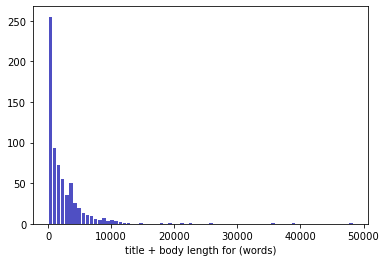

In [225]:
all_words_len= [] #record length
# For every sentence...
for sent in final_data['title_body']:
    all_words_len.append(len(sent.split()))
print('Max sentence length (for words): ', max(all_words_len))  #48372 
print('Min sentence length (for words): ', min(all_words_len))  #6 
print('0.25, 0.5, 0.75, and 0.95 Quantile sentence length (for words):', np.quantile(all_words_len,[0.25, 0.5, 0.75, 0.95]) ) 
_ = plt.hist(x=all_words_len, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('title + body length for (words)')

Token indices sequence length is longer than the specified maximum sequence length for this model (4052 > 512). Running this sequence through the model will result in indexing errors


Max sentence length (for tokens):  62322
Min sentence length (for tokens):  15
0.25, 0.5, 0.75, and 0.95 Quantile sentence length:  [  463.  1727.  4318. 10638.]


Text(0.5, 0, 'title + body length for (tokens)')

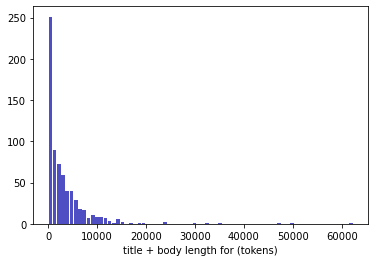

In [226]:
all_tokens_len = [] #record length
# For every sentence...
for sent in final_data['title_body']:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    all_tokens_len.append(len(input_ids))
print('Max sentence length (for tokens): ', max(all_tokens_len))  #62316 
print('Min sentence length (for tokens): ', min(all_tokens_len))  #15 
print('0.25, 0.5, 0.75, and 0.95 Quantile sentence length: ', np.quantile(all_tokens_len,[0.25, 0.5, 0.75, 0.95]) ) 
_ = plt.hist(x=all_tokens_len, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('title + body length for (tokens)')

### Split data into train data and test data (we use test data as validation data)

In [228]:
from sklearn.model_selection import train_test_split
random_seed = 2021
final_data_train, final_data_test = train_test_split(final_data, test_size=0.2, random_state=random_seed, shuffle=True)
final_data_valid = final_data_test
print('training data size:', len(final_data_train))
print('test data size:', len(final_data_test))

training data size: 544
test data size: 137


### Tokenize with Chunking

In [229]:
MAX_LEN = 512

In [230]:
import numpy as np
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case = True)
input_ids = []    # chunks embedding ID 
all_class_labels = final_data['class'].to_numpy().astype("int64") # Get the labels from the DataFrame, and convert to int64.
author_names = final_data['author'].to_numpy()  # Get the author names from the dataset.

chunk_labels = [] # Record Classification labels for chunks.
chunk_author = [] # Record author names for chunks 
chunk_nums = []   # Record number of chunks for each author

print('Tokenizing comments...')
# For every sentence...
for i, sen in enumerate(final_data['title_body']):
    if ((len(input_ids) % 200) == 0):
        print('Read {:,} comments.'.format(len(input_ids)))

    encoded_sent = tokenizer.encode(
                        sen,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        #max_length = 512,          # Truncate all sentences.                        
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   ) 
    label_i = all_class_labels[i]
    author_i = author_names[i]

    if len(encoded_sent) > MAX_LEN:   #For long document, chunk it
        encoded_sent = encoded_sent[1:-1]   # Strip off special tokens.
        chunk_len = MAX_LEN - 2             # each chunk needs its own CLS and SEP tokens.
        chunk_nums.append(len(range(0, len(encoded_sent), chunk_len))) ### add number of chunks for each author
        # For each starting index...
        for j in range(0, len(encoded_sent), chunk_len):
            tokens = encoded_sent[j:j+chunk_len]
            chunk = [tokenizer.cls_token_id] + tokens + [tokenizer.sep_token_id]   # Add the special tokens.
            input_ids.append(chunk)
            chunk_labels.append(label_i)    # Give all the chunks the same label.
            chunk_author.append(author_i)   # Give all the chunks the same author names. 
    
    else:    #For short document, add it to the list.
        chunk_nums.append(1) ### add number of chunks for each author
        input_ids.append(encoded_sent)
        chunk_labels.append(label_i)
        chunk_author.append(author_i)   

print('DONE.')
print('{:>10,} documents before chunking'.format(len(final_data)))
print('{:>10,} comments after chunking'.format(len(input_ids)))
print('{:>10,} length of each chunk'.format(MAX_LEN))
assert(len(input_ids) == len(chunk_labels)) #number of chunks should = number of classification labels

Token indices sequence length is longer than the specified maximum sequence length for this model (4052 > 512). Running this sequence through the model will result in indexing errors


Tokenizing comments...
Read 0 comments.
Read 200 comments.
Read 600 comments.
Read 3,600 comments.
Read 4,600 comments.
DONE.
       681 documents before chunking
     4,706 comments after chunking
       512 length of each chunk


minimum number of chunks 1
maximum number of chunks 123
0.25, 0.5, 0.75, and 0.95 Quantile number of chunks:  [ 1.  4.  9. 21.]


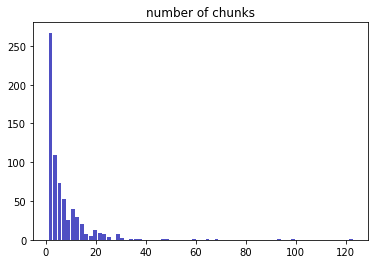

In [231]:
# minimum and maximum chunks per individual
import matplotlib.pyplot as plt
print('minimum number of chunks', min(chunk_nums))
print('maximum number of chunks', max(chunk_nums))
_, _, _ = plt.hist(x=chunk_nums, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('number of chunks')
print('0.25, 0.5, 0.75, and 0.95 Quantile number of chunks: ', np.quantile(chunk_nums,[0.25, 0.5, 0.75, 0.95]) ) 

### Pad chunks

In [232]:
# Some of the samples need to be padded out to 128 tokens 
from keras.preprocessing.sequence import pad_sequences
print('Padding/truncating all chunks to %d values...' % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))
# Pad input tokens with value 0.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
print('{:>10,} chunks in total'.format(len(input_ids)))

Padding/truncating all chunks to 512 values...
Padding token: "[PAD]", ID: 0
     4,706 chunks in total


### Add Attention Masks

In [233]:
# Create attention masks for each chunk
attention_masks = []
for chu in input_ids:
    att_mask = [int(token_id > 0) for token_id in chu]
    attention_masks.append(att_mask)
print('{:>10,} attention masks in total'.format(len(attention_masks)))
print('{:>10,} length for each attention mask'.format(len(attention_masks[0])))

     4,706 attention masks in total
       512 length for each attention mask


### Obtain training input and test input

In [234]:
train_authors_set = set(final_data_train['author'])
test_authors_set = set(final_data_test['author'])
train_inputs, train_labels, train_masks, train_chunk_author   = [], [], [], []
test_inputs, test_labels, test_masks, test_chunk_author  = [], [], [], []
for i in range(len(input_ids)):
  if chunk_author[i] in train_authors_set:
    train_inputs.append(input_ids[i])
    train_masks.append(attention_masks[i])
    train_labels.append(chunk_labels[i])
    train_chunk_author.append(chunk_author[i])

  else:
    test_inputs.append(input_ids[i])
    test_masks.append(attention_masks[i])  
    test_labels.append(chunk_labels[i])
    test_chunk_author.append(chunk_author[i])

train_inputs = np.array(train_inputs)
test_inputs = np.array(test_inputs)
print('traning data has %d authors, %d chunks'%(len(train_authors_set), len(train_inputs) ))
print('test data has %d authors, %d chunks'%(len(test_authors_set), len(test_inputs)))

traning data has 544 authors, 3765 chunks
test data has 137 authors, 941 chunks


### Dictionary mapping authors to chunk index

In [235]:
train_author_ind_dic, test_author_ind_dic ={}, {}
for i in range(len(train_chunk_author)):
    Author = train_chunk_author[i]
    if Author not in train_author_ind_dic: 
      train_author_ind_dic[Author] = [i]
    else:
      train_author_ind_dic[Author].append(i)
for i in range(len(test_chunk_author)):
    Author = test_chunk_author[i]
    if Author not in test_author_ind_dic: 
      test_author_ind_dic[Author] = [i]
    else:
      test_author_ind_dic[Author].append(i)
print('traning dictionary has %d authors'%(len(train_author_ind_dic)))
print('test dictionary has %d authors'%(len(test_author_ind_dic)))

traning dictionary has 544 authors
test dictionary has 137 authors


### Convert all inputs and labels into torch tensors

In [236]:
import torch
train_inputs = torch.tensor(train_inputs)
test_inputs = torch.tensor(test_inputs)

train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)

train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

### Create an iterator for our dataset using the torch DataLoader class. (help save on memory during training)

In [237]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32
# Create the DataLoader for training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for training prediction set.
train_pred_sampler = SequentialSampler(train_data) #Sequential, not random
train_pred_dataloader = DataLoader(train_data, sampler=train_pred_sampler, batch_size=batch_size)
# Create the DataLoader for test set.
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

### BertForSequenceClassification

In [238]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained(
    "bert-large-uncased", # Use the 12-layer BERT model, with an uncased vocab.  
    num_labels = len(set(final_data['class'])), # The number of output labels    
    output_attentions = False, # Whether the model returns attentions weights.  
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

### Optimizer and Learning Rate

In [239]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [240]:
from transformers import get_linear_schedule_with_warmup
epochs = 7
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

### Define two functions to calculate accuracy and time

In [241]:
import numpy as np
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = np.array(labels).flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [242]:
import time
import datetime
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))


### Training (On GW HPC)

In [ ]:
import random
import os

#<prevent running>
# Set the seed value all over the place to make this reproducible.
seed_val = 2021
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

model.to(device)
# Store the average loss for plotting
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_loss = 0
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 100 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    #save every epoch model
    output_dir = './output_files/BERTlarge_CLS2_model_chunk512_epoch' + str(epoch_i+1) +'/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    print("Saving model to %s" % output_dir)
    model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
    model_to_save.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

print("")
print("Training complete!")


======== Epoch 1 / 9 ========
Training...
  Batch   100  of    228.    Elapsed: 0:02:14.
  Batch   200  of    228.    Elapsed: 0:04:33.

  Average training loss: 0.95
  Training epcoh took: 0:05:11
Saving model to /content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERT_CLS3_model_chunk256_epoch1/

======== Epoch 2 / 9 ========
Training...
  Batch   100  of    228.    Elapsed: 0:02:19.
  Batch   200  of    228.    Elapsed: 0:04:39.

  Average training loss: 0.74
  Training epcoh took: 0:05:17
Saving model to /content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERT_CLS3_model_chunk256_epoch2/

======== Epoch 3 / 9 ========
Training...
  Batch   100  of    228.    Elapsed: 0:02:20.
  Batch   200  of    228.    Elapsed: 0:04:39.

  Average training loss: 0.52
  Training epcoh took: 0:05:17
Saving model to /content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERT_CLS3_model_chunk256_epoch3/

======== Epoch 4 / 9 ========
Training...
  Batch   100  of    228

### Evaluate on training data (On GW HPC)

In [ ]:
# Prediction on training dataset
#<prevent running>
for t in range(1,epochs+1):
  output_dir = './output_files/BERTlarge_CLS2_model_chunk512_epoch' + str(t) + '/' 
  model_chuncking = BertForSequenceClassification.from_pretrained(output_dir)
  tokenizer = tokenizer.from_pretrained(output_dir)
  model_chuncking.to(device)  # Copy the model to the GPU.

  print('Predicting labels for {:,} training chunks...'.format(len(train_inputs)))
  model_chuncking.eval()
  predictions  = []

  t0 = time.time()
  for (step, batch) in enumerate(train_pred_dataloader):
      
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
    
      # Progress update every 100 batches.
      if step % 100 == 0 and not step == 0:
          elapsed = format_time(time.time() - t0)
          print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_pred_dataloader), elapsed))

      # Unpack the inputs from dataloader
      b_input_ids, b_input_mask, b_labels = batch
      with torch.no_grad():
          # Forward pass, calculate logit predictions
          outputs = model_chuncking(b_input_ids, token_type_ids=None, 
                          attention_mask=b_input_mask)

      logits = outputs[0]
      logits = logits.detach().cpu().numpy()
      predictions.append(logits)

  print('------DONE.------')
  predictions = np.concatenate(predictions, axis=0)

  #save the predictions:
  np.savetxt('./output_files/BERTlarge_CLS2_model_chunk512_epoch' + str(t) +'/train_predictions_chunk512_epoch'+str(t)+'.txt', predictions)


Predicting labels for 7,287 training chunks...
  Batch   100  of    228.    Elapsed: 0:00:46.
  Batch   200  of    228.    Elapsed: 0:01:34.
------DONE.------
Predicting labels for 7,287 training chunks...
  Batch   100  of    228.    Elapsed: 0:00:48.
  Batch   200  of    228.    Elapsed: 0:01:37.
------DONE.------
Predicting labels for 7,287 training chunks...
  Batch   100  of    228.    Elapsed: 0:00:49.
  Batch   200  of    228.    Elapsed: 0:01:37.
------DONE.------
Predicting labels for 7,287 training chunks...
  Batch   100  of    228.    Elapsed: 0:00:49.
  Batch   200  of    228.    Elapsed: 0:01:37.
------DONE.------
Predicting labels for 7,287 training chunks...
  Batch   100  of    228.    Elapsed: 0:00:49.
  Batch   200  of    228.    Elapsed: 0:01:38.
------DONE.------
Predicting labels for 7,287 training chunks...
  Batch   100  of    228.    Elapsed: 0:00:49.
  Batch   200  of    228.    Elapsed: 0:01:37.
------DONE.------
Predicting labels for 7,287 training chunks...

### Evaluate on test data (On GW HPC)

In [ ]:
# Prediction on test dataset
# <prevent running>
for t in range(1,10):
  output_dir = './output_files/BERTlarge_CLS2_model_chunk512_epoch' + str(t) + '/' 
  model_chuncking = BertForSequenceClassification.from_pretrained(output_dir)
  tokenizer = tokenizer.from_pretrained(output_dir)
  model_chuncking.to(device)  # Copy the model to the GPU.

  print('Predicting labels for {:,} test chunks...'.format(len(test_inputs)))
  model_chuncking.eval()
  predictions  = []

  t0 = time.time()
  for (step, batch) in enumerate(test_dataloader): 
    
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
    
      # Progress update every 100 batches.
      if step % 100 == 0 and not step == 0:
          elapsed = format_time(time.time() - t0)
          print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

      # Unpack the inputs from dataloader
      b_input_ids, b_input_mask, b_labels = batch
      with torch.no_grad():
          # Forward pass, calculate logit predictions
          outputs = model_chuncking(b_input_ids, token_type_ids=None, 
                          attention_mask=b_input_mask)

      logits = outputs[0]
      logits = logits.detach().cpu().numpy()
      predictions.append(logits)

  print('------DONE.------')
  predictions = np.concatenate(predictions, axis=0)

  #save the predictions:
  np.savetxt('./output_files/BERTlarge_CLS2_model_chunk512_epoch' + str(t) +'/test_predictions_chunk512_epoch'+str(t)+'.txt', predictions)


Predicting labels for 1,812 test chunks...
------DONE.------
Predicting labels for 1,812 test chunks...
------DONE.------
Predicting labels for 1,812 test chunks...
------DONE.------
Predicting labels for 1,812 test chunks...
------DONE.------
Predicting labels for 1,812 test chunks...
------DONE.------
Predicting labels for 1,812 test chunks...
------DONE.------
Predicting labels for 1,812 test chunks...
------DONE.------
Predicting labels for 1,812 test chunks...
------DONE.------
Predicting labels for 1,812 test chunks...
------DONE.------


### Check the accuracy of chunks for all epochs

In [243]:
# for colab:
# for t in range(1,epochs+1):
#   train_predictions_chunk512_epoch = np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERTlarge_CLS2_model_chunk512'+'/train_predictions_chunk512_epoch'+str(t)+'.txt', dtype=float)
#   print(flat_accuracy(train_predictions_chunk512_epoch, train_labels))

# for t in range(1,epochs+1):
#   test_predictions_chunk512_epoch = np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERTlarge_CLS2_model_chunk512'+'/test_predictions_chunk512_epoch'+str(t)+'.txt', dtype=float)
#   print(flat_accuracy(test_predictions_chunk512_epoch, test_labels))

# for local:
for t in range(1,epochs+1):
  train_predictions_chunk512_epoch = np.loadtxt('/Users/muzheguo/Desktop/GWU/Group/MyPaper/fda_intern/output_files/BERTlarge_CLS2_model_chunk512'+'/train_predictions_chunk512_epoch'+str(t)+'.txt', dtype=float)
  print(flat_accuracy(train_predictions_chunk512_epoch, train_labels))

for t in range(1,epochs+1):
  test_predictions_chunk512_epoch = np.loadtxt('/Users/muzheguo/Desktop/GWU/Group/MyPaper/fda_intern/output_files/BERTlarge_CLS2_model_chunk512'+'/test_predictions_chunk512_epoch'+str(t)+'.txt', dtype=float)
  print(flat_accuracy(test_predictions_chunk512_epoch, test_labels))


0.8103585657370518
0.8889774236387782
0.9359893758300133
0.9622841965471447
0.9697211155378486
0.9644090305444887
0.9723771580345285
0.8352816153028693
0.8522848034006376
0.8682252922422954
0.8182784272051009
0.8480340063761955
0.7863974495217854
0.824654622741764


### Get the best result (epoch = 2) and normalize the scores 

In [12]:
# for colab:
# train_predictions_chunk512_epoch2 = np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERTlarge_CLS2_model_chunk512/train_predictions_chunk512_epoch'+str(2)+'.txt', dtype=float)
# test_predictions_chunk512_epoch2 = np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERTlarge_CLS2_model_chunk512/test_predictions_chunk512_epoch'+str(2)+'.txt', dtype=float)

# for local:
train_predictions_chunk512_epoch2 = np.loadtxt('/Users/muzheguo/Desktop/GWU/Group/MyPaper/fda_intern/output_files/BERTlarge_CLS2_model_chunk512/train_predictions_chunk512_epoch'+str(2)+'.txt', dtype=float)
test_predictions_chunk512_epoch2 = np.loadtxt('/Users/muzheguo/Desktop/GWU/Group/MyPaper/fda_intern/output_files/BERTlarge_CLS2_model_chunk512/test_predictions_chunk512_epoch'+str(2)+'.txt', dtype=float)

train_predictions_chunk512_epoch2 = torch.tensor(train_predictions_chunk512_epoch2)
test_predictions_chunk512_epoch2 = torch.tensor(test_predictions_chunk512_epoch2)
train_predictions_chunk512_epoch2 = (train_predictions_chunk512_epoch2-train_predictions_chunk512_epoch2.min(0, keepdim=True).values)/(train_predictions_chunk512_epoch2.max(0, keepdim=True).values - train_predictions_chunk512_epoch2.min(0, keepdim=True).values)
test_predictions_chunk512_epoch2 = (test_predictions_chunk512_epoch2-test_predictions_chunk512_epoch2.min(0, keepdim=True).values)/(test_predictions_chunk512_epoch2.max(0, keepdim=True).values - test_predictions_chunk512_epoch2.min(0, keepdim=True).values)


### (1) train the chunk(time) weight

In [ ]:
max_chunk_nums = 100  #max chunk number, if larger than this, truncate it. 
true_train_labels = torch.tensor( final_data_train['class'].to_numpy().astype("int64"))
print("true_train_labels:",true_train_labels.shape)

### chunk scores of training data
train_chunks_scores = []
for Author in final_data_train['author']:
    chunk_indeces = train_author_ind_dic[Author]
    if len(chunk_indeces) <= max_chunk_nums:
      chunks_outputs = train_predictions_chunk512_epoch2[chunk_indeces, :]
    if len(chunk_indeces) > max_chunk_nums:
      chunks_outputs = train_predictions_chunk512_epoch2[chunk_indeces[0:max_chunk_nums], :]
    train_chunks_scores.append(chunks_outputs)

# chunk scores with zero pad
train_chunks_pad_scores = []
for i in range(len(train_chunks_scores)):
    zero_pad = np.zeros( (max_chunk_nums-len(train_chunks_scores[i]), len(set(final_data['class']))) )
    pad_scores = np.vstack((train_chunks_scores[i], zero_pad))
    train_chunks_pad_scores.append(pad_scores)
train_chunks_pad_scores = torch.tensor(np.array(train_chunks_pad_scores),dtype=torch.float)  #(544,495,4)
print("train_chunks_pad_scores:",train_chunks_pad_scores.shape)

In [295]:
import torch.nn.functional as F
import numpy as np
from torch.nn.parameter import Parameter
import matplotlib.pyplot as plt
import math
import time
import torch
import torch.nn as nn

def loss_func(x, y):
    """
    log_softmax loss 
    
    Inputs:
    - x: prediction scores, of shape (N, C), C is number of class : 4 
    - y: Ground-truth labels, of shape (N, )

    Returns:
    - loss: Scalar giving loss
    """
    loss = None    
    N ,C = x.shape[0] , x.shape[1]
    loss = F.cross_entropy(x, y, reduction='sum') * 1. / N   
    return loss

In [264]:
class Weight_Net(nn.Module):
    def __init__(self, input_dim_r = 495, input_dim_c = 4, channel_dim = 8, reg=0.0, dropratio=0.0, 
                 device='cpu', dtype=torch.float):
        """
        Inputs:
        - input_dim_r: Dimension row of input(number of chunks) 
        - input_dim_c: Dimension column of input(number of class)
        - channel_dim: Dimension of time weight: (channel_dim, input_dim_r) 
        - reg: regularization parameter
        - device: 'cuda' or 'cpu'
        - dtype: datatype to use
        """
        super().__init__()
        
        self.input_dim_r = input_dim_r
        self.input_dim_c = input_dim_c
        self.channel_dim = channel_dim
        self.reg = reg 
        self.dropratio = dropratio
        self.device = device
        self.dtype = dtype

        # Initialize parameters for "chunk weights"
        self.W0 = Parameter(torch.randn(input_dim_r, channel_dim , device=device, dtype=dtype).div(math.sqrt(channel_dim)))
        self.b0 = Parameter(torch.zeros(channel_dim, device=device, dtype=dtype))
        
        self.W1 = Parameter(torch.randn(channel_dim, 1, device=device, dtype=dtype).div(math.sqrt(1)))
        self.b1 = Parameter(torch.zeros(1, device=device, dtype=dtype))

    
    def train_process(self):
        raise NotImplementedError
    
    def test_process(self):
        raise NotImplementedError

In [282]:
    def train_forward(self, chunk_data, y, reg):
        """
        Inputs:
        - chunk_data: (N, input_dim_r = 495, input_dim_c =4) 
        - y: groundtruth labels (N,)

        Outputs:
        - loss: A scalar loss
        """
        loss = 0.0
        N, max_chunk, c = chunk_data.shape
        chunk_data = chunk_data.to(self.device)  #(N, 495, 4) 
        groundTruth_y = y.to(torch.int64).to(self.device) 
        
        #(1) h0
        h0 = self.W0.t().matmul(chunk_data)  #(N,8,4)   W0:(495, channel) W0^T:(channel, 495)
        h0 = F.relu(h0)              #(N,channel,4) 
        h0 = F.dropout(h0, p=self.dropratio) 


        #(2) h1 
        h1 = self.W1.t().matmul(h0)  #(N,1,4)   W1^T : (1, channel)
        h1 = h1.reshape(N,-1)  #(N,4)

        #(3) loss 
        loss = loss_func(h1, groundTruth_y)
        loss +=self.reg * torch.sum(self.W0*self.W0) + self.reg * torch.sum(self.W1*self.W1) #regularization 
        return loss

    Weight_Net.train_process = train_forward

In [283]:
def ModelTrain(model, chunk_data, y_data, reg, lr_decay=1, **kwargs):
    """
    Run optimization to train the model.
    """
    # optimizer setup
    from torch import optim
    optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()), learning_rate) # leave betas and eps by default
    lr_scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: lr_decay ** epoch)

    # sample minibatch data
    iter_per_epoch = math.ceil(chunk_data.shape[0] // batch_size)
    loss_history = []
    model.train()
    for i in range(num_epochs):
        start_t = time.time()
        for j in range(iter_per_epoch):
            chunkdata = chunk_data[j*batch_size:(j+1)*batch_size]
            y = y_data[j*batch_size:(j+1)*batch_size]

            loss = model.train_process(chunkdata, y, reg)
            optimizer.zero_grad() 
            loss.backward()
            loss_history.append(loss.item())
            optimizer.step()
        end_t = time.time()
        print('(Epoch {} / {}) loss: {:.4f} time per epoch: {:.1f}s'.format(i, num_epochs, loss.item(), end_t-start_t))
        lr_scheduler.step()

    # plot the training losses
    plt.plot(loss_history, color='black')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    plt.show()


(Epoch 0 / 200) loss: 1.1288 time per epoch: 0.0s
(Epoch 1 / 200) loss: 0.9667 time per epoch: 0.0s
(Epoch 2 / 200) loss: 0.8494 time per epoch: 0.0s
(Epoch 3 / 200) loss: 0.7562 time per epoch: 0.0s
(Epoch 4 / 200) loss: 0.6799 time per epoch: 0.0s
(Epoch 5 / 200) loss: 0.6179 time per epoch: 0.0s
(Epoch 6 / 200) loss: 0.5673 time per epoch: 0.0s
(Epoch 7 / 200) loss: 0.5257 time per epoch: 0.0s
(Epoch 8 / 200) loss: 0.4907 time per epoch: 0.0s
(Epoch 9 / 200) loss: 0.4609 time per epoch: 0.0s
(Epoch 10 / 200) loss: 0.4353 time per epoch: 0.0s
(Epoch 11 / 200) loss: 0.4133 time per epoch: 0.0s
(Epoch 12 / 200) loss: 0.3941 time per epoch: 0.0s
(Epoch 13 / 200) loss: 0.3771 time per epoch: 0.0s
(Epoch 14 / 200) loss: 0.3619 time per epoch: 0.0s
(Epoch 15 / 200) loss: 0.3484 time per epoch: 0.0s
(Epoch 16 / 200) loss: 0.3363 time per epoch: 0.0s
(Epoch 17 / 200) loss: 0.3254 time per epoch: 0.0s
(Epoch 18 / 200) loss: 0.3157 time per epoch: 0.0s
(Epoch 19 / 200) loss: 0.3068 time per ep

(Epoch 165 / 200) loss: 0.1846 time per epoch: 0.0s
(Epoch 166 / 200) loss: 0.1845 time per epoch: 0.0s
(Epoch 167 / 200) loss: 0.1844 time per epoch: 0.0s
(Epoch 168 / 200) loss: 0.1843 time per epoch: 0.0s
(Epoch 169 / 200) loss: 0.1842 time per epoch: 0.0s
(Epoch 170 / 200) loss: 0.1842 time per epoch: 0.0s
(Epoch 171 / 200) loss: 0.1841 time per epoch: 0.0s
(Epoch 172 / 200) loss: 0.1840 time per epoch: 0.0s
(Epoch 173 / 200) loss: 0.1840 time per epoch: 0.0s
(Epoch 174 / 200) loss: 0.1839 time per epoch: 0.0s
(Epoch 175 / 200) loss: 0.1838 time per epoch: 0.0s
(Epoch 176 / 200) loss: 0.1837 time per epoch: 0.0s
(Epoch 177 / 200) loss: 0.1837 time per epoch: 0.0s
(Epoch 178 / 200) loss: 0.1836 time per epoch: 0.0s
(Epoch 179 / 200) loss: 0.1835 time per epoch: 0.0s
(Epoch 180 / 200) loss: 0.1835 time per epoch: 0.0s
(Epoch 181 / 200) loss: 0.1834 time per epoch: 0.0s
(Epoch 182 / 200) loss: 0.1833 time per epoch: 0.0s
(Epoch 183 / 200) loss: 0.1833 time per epoch: 0.0s
(Epoch 184 /

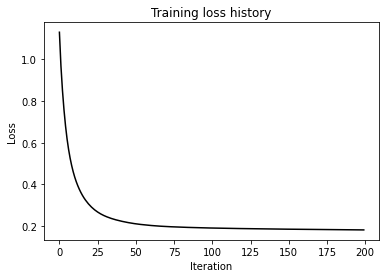

In [310]:
num_epochs = 200
batch_size = 544
learning_rate = 3e-3
to_float_cpu = {'dtype': torch.float, 'device': 'cpu'}
# create the weight_model 
weight_model = Weight_Net(
          input_dim_r = train_chunks_pad_scores.shape[1],
          input_dim_c = train_chunks_pad_scores.shape[2],  
          channel_dim= 64, 
          dropratio = 0.0,
          **to_float_cpu)
ModelTrain(weight_model, train_chunks_pad_scores, true_train_labels,reg = 0.00,
            num_epochs=num_epochs, batch_size=batch_size, 
            learning_rate=learning_rate)


In [302]:
## Get the trained weight
trained_W0 = [i for i in weight_model.parameters()][0]  #(495, 1024)
trained_W1 = [i for i in weight_model.parameters()][2]  #(1024, 1)

### Read the trained weights

In [306]:
# for colab:
# trained_W0 = torch.tensor(np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERTlarge_CLS2_model_chunk512/trained_W0.txt'),dtype=torch.float32)
# trained_W1 = torch.tensor(np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/Reddit_NLP/output_files/BERTlarge_CLS2_model_chunk512/trained_W1.txt'),dtype=torch.float32)
# for local:
trained_W0 = torch.tensor(np.loadtxt('/Users/muzheguo/Desktop/GWU/Group/MyPaper/fda_intern/output_files/BERTlarge_CLS2_model_chunk512/trained_W0.txt'),dtype=torch.float32)
trained_W1 = torch.tensor(np.loadtxt('/Users/muzheguo/Desktop/GWU/Group/MyPaper/fda_intern/output_files/BERTlarge_CLS2_model_chunk512/trained_W1.txt'),dtype=torch.float32)

### (2) test data: original chunk scores and zero-pad chunk scores

In [307]:
true_test_labels =  final_data_test['class'].to_numpy().astype("int64")
test_chunks_scores = []

for Author in final_data_test['author']:
    chunk_indeces = test_author_ind_dic[Author]
    if len(chunk_indeces) <= max_chunk_nums:
      chunks_outputs = test_predictions_chunk512_epoch2[chunk_indeces, :]
    if len(chunk_indeces) > max_chunk_nums:
      chunks_outputs = test_predictions_chunk512_epoch2[chunk_indeces[0:max_chunk_nums], :]
    test_chunks_scores.append(chunks_outputs)

### zero-pad chunk scores
test_chunks_pad_scores = []
for i in range(len(test_chunks_scores)):
    zero_pad = np.zeros( (max_chunk_nums -len(test_chunks_scores[i]), len(set(final_data['class']))) )
    pad_score = np.vstack((test_chunks_scores[i], zero_pad))
    test_chunks_pad_scores.append(pad_score)
test_chunks_pad_scores = torch.tensor(np.array(test_chunks_pad_scores),dtype=torch.float)  #(544,495,4)
print('test_chunks_pad_scores:',test_chunks_pad_scores.shape)

test_chunks_pad_scores: torch.Size([137, 100, 2])


### (3) time weight and weighted scores

In [308]:
test_h0 = trained_W0.t().matmul(test_chunks_pad_scores)
weighted_test_scores = trained_W1.t().matmul(test_h0).reshape(len(true_test_labels),-1)
weighted_test_scores = weighted_test_scores.detach().numpy() # convert torch.tensor to array

### (4) Final Accuracy

0.9124087591240876


Text(0.5, 1.0, 'Predicted lables(by weighted chunk scores)')

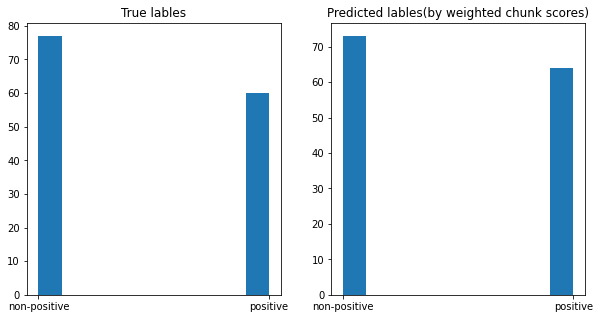

In [317]:
print(flat_accuracy(weighted_test_scores, true_test_labels)) 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
true_test_labels_text = [['non-positive','positive'][true_test_labels[i]] for i in range(len(true_test_labels))]
plt.hist(true_test_labels_text)
# plt.xticks(rotation=45)
plt.title('True lables')

plt.subplot(1, 2, 2)
weighted_labels = np.argmax(weighted_test_scores, axis=1)
weighted_labels_text = [['non-positive','positive'][weighted_labels[i]] for i in range(len(weighted_labels))]
plt.hist(weighted_labels_text)
# plt.xticks(rotation=45)
plt.title('Predicted lables(by weighted chunk scores)')

### Look at the incorrect prediction:

In [290]:
incorrect_prediction = pd.DataFrame(columns=['Author','Groundtruth labels','Predicted labels','title_body'],)
incorrect_prediction = []
print("incorrect prediction:")
for i in range(len(true_test_labels_text)):
    if weighted_labels_text[i] == true_test_labels_text[i] : 
        continue
    else:
        print(true_test_labels_text[i],"------------>", weighted_labels_text[i])
        incorrect_prediction.append([final_data_test.iloc[i].author, true_test_labels_text[i], 
                                     weighted_labels_text[i], final_data_test.iloc[i].title_body])

incorrect_prediction = pd.DataFrame(incorrect_prediction,
                                    columns=['Author','Groundtruth labels','Predicted labels','title_body'])
pd.options.display.max_colwidth = 5000
# incorrect_prediction.to_csv('./chuncking_model_drop128/incorrect_prediction.csv',encoding='utf_8_sig')
incorrect_prediction

incorrect prediction:
Unconfirmed/Questionable ------------> Tested Positive
Unconfirmed/Questionable ------------> Tested Positive
Tested Positive ------------> Unconfirmed/Questionable
Unconfirmed/Questionable ------------> Tested Positive
Unconfirmed/Questionable ------------> Tested Positive
Unconfirmed/Questionable ------------> Tested Positive
Tested Positive ------------> Unconfirmed/Questionable
Tested Positive ------------> Unconfirmed/Questionable
Tested Positive ------------> Unconfirmed/Questionable
Unconfirmed/Questionable ------------> Tested Positive
Unconfirmed/Questionable ------------> Tested Positive
Unconfirmed/Questionable ------------> Tested Positive


Author        Groundtruth labels          Predicted labels  \
0        prrk-industries  Unconfirmed/Questionable           Tested Positive   
1                 jnrj10  Unconfirmed/Questionable           Tested Positive   
2   beerdrinkerlifesaver           Tested Positive  Unconfirmed/Questionable   
3            InitialHall  Unconfirmed/Questionable           Tested Positive   
4               8bitcake  Unconfirmed/Questionable           Tested Positive   
5            FerretWrath  Unconfirmed/Questionable           Tested Positive   
6            nyteacher19           Tested Positive  Unconfirmed/Questionable   
7        Ourtimedownhere           Tested Positive  Unconfirmed/Questionable   
8      theSafestofSpaces           Tested Positive  Unconfirmed/Questionable   
9            beehugger11  Unconfirmed/Questionable           Tested Positive   
10            Itsfarrlee  Unconfirmed/Questionable           Tested Positive   
11               Pitboos  Unconfirmed/Questionable           Tested Positive   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### For training data Accuracy:

In [291]:
true_train_labels =  final_data_train['class'].to_numpy().astype("int64")
train_chunks_scores = []
# For each of the original test samples...
for Author in final_data_train['author']:
    chunk_indeces = train_author_ind_dic[Author]
    if len(chunk_indeces) <= max_chunk_nums:
      chunks_outputs = train_predictions_chunk512_epoch2[chunk_indeces, :]
    if len(chunk_indeces) > max_chunk_nums:
      chunks_outputs = train_predictions_chunk512_epoch2[chunk_indeces[0:max_chunk_nums], :]
    train_chunks_scores.append(chunks_outputs)


train_chunks_pad_scores = []
for i in range(len(train_chunks_scores)):
    zero_pad = np.zeros( (max_chunk_nums-len(train_chunks_scores[i]), len(set(final_data['class']))) )
    pad_score = np.vstack((train_chunks_scores[i], zero_pad))
    train_chunks_pad_scores.append(pad_score)
train_chunks_pad_scores = torch.tensor(np.array(train_chunks_pad_scores),dtype=torch.float)  #(544,495,4)
print('train_chunks_pad_scores:',train_chunks_pad_scores.shape) 

train_h0 = trained_W0.t().matmul(train_chunks_pad_scores)
weighted_train_scores = trained_W1.t().matmul(train_h0).reshape(len(true_train_labels),-1)
weighted_train_scores = weighted_train_scores.detach().numpy() # convert torch.tensor to array

print('training data accuracy:',flat_accuracy(weighted_train_scores, true_train_labels))

train_chunks_pad_scores: torch.Size([544, 100, 2])
training data accuracy: 0.9117647058823529


### If only use the mean of chunk scores

test data accuracy(using mean chunk scores): 0.8686131386861314


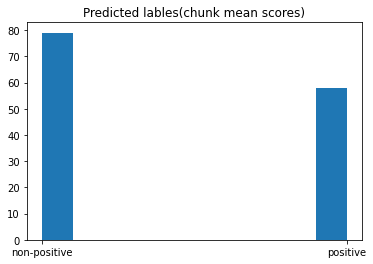

In [319]:
p_ave_scores = []

for Author in final_data_test['author']:

    # `chunk_indeces` is the list of indeces in `predictions` of the chunks for
    # sample `test_i`.
    
    chunk_indeces = test_author_ind_dic[Author]

    # Select the outputs of the "label 1" classifier for all chunks
    chunks_outputs = test_predictions_chunk512_epoch2[chunk_indeces, :]

    # Average them and use this as the prediction.
    chunks_outputs = np.array(chunks_outputs)
    p_ave_scores.append(np.mean(chunks_outputs, axis=0))

p_ave_scores = np.array(p_ave_scores)

p_ave_scores_label = np.argmax(p_ave_scores, axis=1)
p_ave_scores_label_text = [['non-positive','positive'][p_ave_scores_label[i]] for i in range(len(p_ave_scores_label))]
plt.hist(p_ave_scores_label_text)
# plt.xticks(rotation=45)
plt.title('Predicted lables(chunk mean scores)')
print('test data accuracy(using mean chunk scores):',flat_accuracy(p_ave_scores, final_data_test['class']))

### ##############################################################################

### ############ Prediction of anthors, JuneJulyAugust, 2020############################

### ##############################################################################

In [ ]:
JunJulAug_testdata_raw = pd.read_excel (r'C:\Users\Muzhe.Guo\MuzheFiles\JunJulAug NVIVO 1762 dup removed.xlsx', sheet_name = 'Upload')
JunJulAug_testdata_raw.head()


,Author,Count,filter,body,date,permalink,flair,Title,CONCAT
0,200055,21,yes,I’m 19 F and tested positive Tuesday 6/23. My ...,2020-06-27 20:59:43,/r/COVID19positive/comments/hgyn6t/is_anyone_h...,comment,comment,comment\n\nI’m 19 F and tested positive Tuesda...
1,200055,21,yes,[removed],2020-06-27 21:23:10,/r/COVID19positive/comments/hh1t6b/ongoing_gi_...,Tested Positive - Me,Ongoing GI Symptoms? 19F,Ongoing GI Symptoms? 19F\n\n[removed]-200055\n...
2,200055,21,yes,When are you supposed to get retested for COVI...,2020-06-27 21:35:30,/r/COVID19positive/comments/hgqz17/daily_discu...,comment,comment,comment\n\nWhen are you supposed to get retest...
3,200055,21,yes,Did he have any GI symptoms? And is he getting...,2020-06-27 21:45:52,/r/COVID19positive/comments/hgz6qx/cousin_test...,comment,comment,comment\n\nDid he have any GI symptoms? And is...
4,200055,21,yes,My primary symptom with COVID has been diarrhe...,2020-06-27 21:55:57,/r/COVID19positive/comments/hgzefn/anyone_only...,comment,comment,comment\n\nMy primary symptom with COVID has b...


In [ ]:
print("rows of JunJulAug_testdata", len(JunJulAug_testdata_raw))
JunJulAug_testdata = JunJulAug_testdata_raw[JunJulAug_testdata_raw['body'] != '[removed]']
print("rows of JunJulAug_testdata after removing [removed]", len(JunJulAug_testdata))

rows of JunJulAug_testdata 40445
rows of JunJulAug_testdata after removing [removed] 40444


In [ ]:
print(JunJulAug_testdata['flair'].value_counts())

comment                                  37710
Tested Positive - Me                      1504
Question-to those who tested positive      420
Tested Positive                            400
Presumed Positive - From Doctor            170
Tested Positive - Family                    63
Question-for medical research               49
Presumed Positive - From Test               29
Tested Positive - Friends                   10
Name: flair, dtype: int64


In [ ]:
# remove /n /r _x000D_ in body sentences, convert some body sentences with type float/time type into string  
import re
author_678_2020 = JunJulAug_testdata.Author.values
body_sentences_678_2020 = JunJulAug_testdata.body.values
title_678_2020 = JunJulAug_testdata.Title.values
title_body_sentences_678_2020 = []

for i in range(len(body_sentences_678_2020)):
    if type(body_sentences_678_2020[i]) != str:
        body_sentences_678_2020[i] = str(body_sentences_678_2020[i]) 
    body_sentences_678_2020[i] = body_sentences_678_2020[i].replace('_x000D_',' ').replace('\r', '').replace('\n', '').replace('&amp;','&')
    body_sentences_678_2020[i] = re.sub(r'\<U\+[A-Za-z0-9]+\>','', body_sentences_678_2020[i]) #remove emoji
    title_body_sentences_678_2020.append(title_678_2020[i] + ": " + body_sentences_678_2020[i])
    
temp_data = pd.DataFrame()
temp_data['author'] = author_678_2020 
temp_data['title_body_sentences'] = title_body_sentences_678_2020 
temp_data['title_body'] = temp_data.groupby(['author'])['title_body_sentences'].transform(lambda x: '. '.join(x))

final_JunJulAug_testdata = temp_data[['author','title_body']]
final_JunJulAug_testdata = final_JunJulAug_testdata.drop_duplicates()   
final_JunJulAug_testdata = final_JunJulAug_testdata.reset_index(drop=True)
final_JunJulAug_testdata

,author,title_body
0,200055,comment: I’m 19 F and tested positive Tuesday ...
1,-_-_-_-_-__-_-,Flu symptoms gone - but chest symptoms appeare...
2,__illmatic,Infecting parents ?: Just tested positive but ...
3,__m1,"comment: Hey all, I tested positive last week...."
4,_mommy2benton,comment: My only symptoms so far have been bas...
...,...,...
1647,zonglagyraho,comment: 45 days have been passed and everythi...
1648,ZoominBoomin,It's been about 66 days since I've been deemed...
1649,Zuvitana,Keep testing positive even though I feel fine:...
1650,zy78,Details and advice from my long term experienc...


### Prepare JunJulAug  test data

In [ ]:
import numpy as np
input_ids_test_678_2020 = []
lengths_test_678_2020 = []
chunk_labels_678_2020 = []
MAX_LEN = 128

print('Tokenizing comments...')
orig_to_chunk_678_2020 = {}

# For every sentence...
for i, sen in enumerate(final_JunJulAug_testdata['title_body']):
    
    if ((len(input_ids_test_678_2020) % 200) == 0):
        print('  Read {:,} comments.'.format(len(input_ids_test_678_2020)))

    encoded_sent = tokenizer.encode(
                        sen,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    orig_to_chunk_678_2020[i] = []

    if len(encoded_sent) > MAX_LEN:

        encoded_sent = encoded_sent[1:-1]
        chunk_len = MAX_LEN - 2

        for j in range(0, len(encoded_sent), chunk_len):
            tokens = encoded_sent[j:j+chunk_len]
            chunk = [tokenizer.cls_token_id] + tokens + [tokenizer.sep_token_id]
            input_ids_test_678_2020.append(chunk)
            orig_to_chunk_678_2020[i].append(len(input_ids_test_678_2020) - 1) 
    else:
        input_ids_test_678_2020.append(encoded_sent)
        chunk_labels_678_2020.append(label)
        orig_to_chunk_678_2020[i].append(len(input_ids_test_678_2020) - 1)

print('DONE.')
print('{:>10,} comments before chunking'.format(len(final_JunJulAug_testdata['title_body'])))
print('{:>10,} comments after chunking'.format(len(input_ids_test)))

Tokenizing comments...
  Read 0 comments.
  Read 5,800 comments.
  Read 6,600 comments.
  Read 8,200 comments.
  Read 9,800 comments.
  Read 15,600 comments.
  Read 16,800 comments.
  Read 20,400 comments.
  Read 22,800 comments.
DONE.
     1,652 comments before chunking
     3,544 comments after chunking


### Add padding and attention masks for JunJulAug test data

In [ ]:
chunk_labels_678_2020 = [0]*len(input_ids_test_678_2020)

test_input_ids_678_2020 = pad_sequences(input_ids_test_678_2020, maxlen=MAX_LEN, 
                               dtype="long", truncating="post", padding="post")

# Create attention masks
test_attention_masks_678_2020 = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in test_input_ids_678_2020:
    seq_mask = [float(i>0) for i in seq]
    test_attention_masks_678_2020.append(seq_mask) 

# Convert to tensors.
test_inputs_678_2020 = torch.tensor(test_input_ids_678_2020)
test_masks_678_2020 = torch.tensor(test_attention_masks_678_2020)
chunk_labels_678_2020 = torch.tensor(chunk_labels_678_2020)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
test_data_678_2020 = TensorDataset(test_inputs_678_2020, test_masks_678_2020, chunk_labels_678_2020)
test_sampler_678_2020 = SequentialSampler(test_data_678_2020)
test_dataloader_678_2020 = DataLoader(test_data_678_2020, sampler=test_sampler_678_2020, batch_size=batch_size)

### Evaluate on JunJulAug test data

In [ ]:
# Prediction on JunJulAug test  set
<prevent running>
print('Predicting labels for {:,} test sentences...'.format(len(test_inputs_678_2020)))

# Put model in evaluation mode
model_chuncking.eval()

# Tracking variables 
predictions_678_2020 , true_labels_678_2020 = [], []

# Measure elapsed time.
t0 = time.time()

# Predict 
for (step, batch) in enumerate(test_dataloader_678_2020):
    
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Progress update every 100 batches.
    if step % 100 == 0 and not step == 0:
        # Calculate elapsed time in minutes.
        elapsed = format_time(time.time() - t0)
        
        # Report progress.
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader_678_2020), elapsed))


    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model_chuncking(b_input_ids, token_type_ids=None, 
                        attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits to CPU
    logits = logits.detach().cpu().numpy()
  
    # Store predictions and true labels
    predictions_678_2020.append(logits)

print('    DONE.')
predictions_678_2020 = np.concatenate(predictions_678_2020, axis=0)

Predicting labels for 25,526 test sentences...
  Batch   100  of    798.    Elapsed: 0:12:12.
  Batch   200  of    798.    Elapsed: 0:24:06.
  Batch   300  of    798.    Elapsed: 0:36:44.
  Batch   400  of    798.    Elapsed: 0:48:51.
  Batch   500  of    798.    Elapsed: 1:00:57.
  Batch   600  of    798.    Elapsed: 1:12:56.
  Batch   700  of    798.    Elapsed: 1:25:18.
    DONE.


In [ ]:
#read the saved file:
#np.savetxt('./chuncking_model_drop128_epoch6/test_seed2021_predictions_678_2020_drop128_epoch6.txt', predictions_678_2020)
predictions_678_2020_drop128_epoch6 = np.loadtxt('./chuncking_model_drop128_epoch6/test_seed2021_predictions_678_2020_drop128_epoch6.txt', dtype=float)

positives percentage: 0.7524213075060533


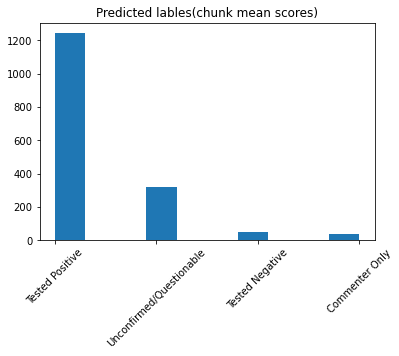

In [ ]:
p_ave_678_2020 = []
for test_i in range(0, len(final_JunJulAug_testdata)):

    # `chunk_indeces` is the list of indeces in `predictions` of the chunks for
    # sample `test_i`.
    chunk_indeces = orig_to_chunk_678_2020[test_i]

    # Select the outputs of the "label 1" classifier for all chunks
    chunks_outputs = predictions_678_2020_drop128_epoch6[chunk_indeces, :]

    # Average them and use this as the prediction.
    p_ave_678_2020.append(np.mean(chunks_outputs, axis=0))

p_ave_678_2020 = np.array(p_ave_678_2020)


p_ave_678_2020_label = np.argmax(p_ave_678_2020, axis=1)
p_ave_678_2020_label_text = [list(Class_dic.keys())[p_ave_678_2020_label[i]] for i in range(len(p_ave_678_2020_label))]
plt.hist(p_ave_678_2020_label_text)
plt.xticks(rotation=45)
plt.title('Predicted lables(chunk mean scores)')
print('positives percentage:', sum(p_ave_678_2020_label[p_ave_678_2020_label==1])/len(p_ave_678_2020_label))

### load trained weights

In [ ]:
trained_W0 = np.loadtxt('./chuncking_model_drop128_epoch6/trained_W0.txt', dtype=float)
trained_W1 = np.loadtxt('./chuncking_model_drop128_epoch6/trained_W1.txt', dtype=float)

### JunJulAug test data: original chunk scores and zero-pad chunk scores

In [ ]:
test_chunks_scores_678_2020 = []

# For each of the original test samples...
for test_i in range(0, len(final_JunJulAug_testdata)):

    # `chunk_indeces` is the list of indeces in `predictions` of the chunks for
    # sample `test_i`.
    chunk_indeces = orig_to_chunk_678_2020[test_i]

    # Select the outputs of the "label 1" classifier for all chunks
    chunks_outputs = predictions_678_2020_drop128_epoch6[chunk_indeces, :]

    # Average them and use this as the prediction.
    test_chunks_scores_678_2020.append(chunks_outputs)
    
### zero-pad chunk scores
test_chunks_pad_scores_678_2020 = []
for i in range(len(test_chunks_scores_678_2020)):
    zero_pad = np.zeros( (max(chunk_nums)-len(test_chunks_scores_678_2020[i]), 4) )
    pad_score = np.vstack((test_chunks_scores_678_2020[i], zero_pad))
    test_chunks_pad_scores_678_2020.append(pad_score)
test_chunks_pad_scores_678_2020 = torch.tensor(np.array(test_chunks_pad_scores_678_2020),dtype=torch.float)  #(544,495,4)
print('test_chunks_pad_scores_678_2020:',test_chunks_pad_scores_678_2020.shape)

ValueError: negative dimensions are not allowed

### ######################################################################
### Updated file 
### ######################################################################

In [ ]:
import pandas as pd
Authors_NLP_Project_file = pd.read_excel (r'C:\Users\Muzhe.Guo\MuzheFiles\Classification Sheet - Authors NLP Project.xlsx', sheet_name = 'Authors')
Authors_NLP_Project_file['Authors'] = Authors_NLP_Project_file['Authors'].astype(str)
Authors_NLP_Project_file['Patient Classification'] = Authors_NLP_Project_file['Patient Classification'].str.lower()

Missing_Symptoms_file = pd.read_excel (r'C:\Users\Muzhe.Guo\MuzheFiles\Classification Sheet - Missing Symptoms.xlsx', sheet_name = 'Authors') 
Missing_Symptoms_file['Patient Classification'] = Missing_Symptoms_file['Patient Classification'].str.lower()
short_Authors = [i.split('\\\\')[-1] for i in Missing_Symptoms_file['Authors']]
Missing_Symptoms_file['short_Authors'] = short_Authors


In [ ]:
# Authors_NLP_Project_file['Location'].isna()

In [ ]:
Authors_NLP_Project_file

,Authors,Aches,Cough,Fatigue,Fever or Chills,GI,Headache,Location,Loss of senses,MarAprMay duplicate,Nose,Patient Classification,SOB,Throat
0,Arkeolog,NaN,NaN,NaN,NaN,NaN,NaN,Outside US,NaN,NaN,NaN,NaN,NaN,NaN
1,A818A,NaN,NaN,NaN,NaN,NaN,NaN,Outside US,NaN,NaN,NaN,NaN,NaN,NaN
2,AbsoluteWaffling,NaN,NaN,NaN,NaN,NaN,NaN,Outside US,NaN,NaN,NaN,NaN,NaN,NaN
3,Advo96,NaN,NaN,NaN,NaN,NaN,NaN,Outside US,NaN,NaN,NaN,NaN,NaN,NaN
4,agirlwhosews,NaN,NaN,NaN,NaN,NaN,NaN,Outside US,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,__illmatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tested Positive,NaN,NaN
1757,abdi9ine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tested Positive,NaN,NaN
1758,angers71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tested Positive,NaN,NaN
1759,antibodyangels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commenter only,NaN,NaN


In [ ]:
merged_Authors_NLP_Project = Missing_Symptoms_file.copy()
for aut in short_Authors:
    aut_row_m = Missing_Symptoms_file[Missing_Symptoms_file['short_Authors']==aut]
    aut_row_p = Authors_NLP_Project_file[Authors_NLP_Project_file['Authors']==aut]
    for c in Authors_NLP_Project_file.columns[1:]: #remove author column
        if aut_row_m[c].isna().item() and aut_row_p[c].isna().item():
            merged_Authors_NLP_Project.loc[merged_Authors_NLP_Project['short_Authors']==aut,c] =aut_row_m[c].item()       
        elif aut_row_m[c].isna().item() and not aut_row_p[c].isna().item():
            merged_Authors_NLP_Project.loc[merged_Authors_NLP_Project['short_Authors']==aut,c] =aut_row_p[c].item()       
        elif not aut_row_m[c].isna().item() and aut_row_p[c].isna().item():
            merged_Authors_NLP_Project.loc[merged_Authors_NLP_Project['short_Authors']==aut,c] =aut_row_m[c].item()       
        elif not aut_row_m[c].isna().item() and not aut_row_p[c].isna().item():
            if aut_row_m[c].item() == aut_row_p[c].item():
                merged_Authors_NLP_Project.loc[merged_Authors_NLP_Project['short_Authors']==aut,c] =aut_row_m[c].item()       
            else:
                print(aut_row_m)
                print(aut_row_p)           
del merged_Authors_NLP_Project['short_Authors']
#save
#merged_Authors_NLP_Project.to_csv('./merged_Authors_NLP_Project.csv',encoding='utf_8_sig')


                                          Authors Aches Cough Fatigue  \
1282  Cases\\JunJulAug NVIVO 1762\\ramoanaflowers   NaN   NaN     NaN   

     Fever or Chills   GI Headache Length of Disease Location Loss of senses  \
1282             NaN  NaN      NaN               NaN      NaN            NaN   

     MarAprMay duplicate Nose Patient Classification  SOB Throat  \
1282                 NaN  NaN        tested negative  NaN    NaN   

       short_Authors  
1282  ramoanaflowers  
             Authors Aches Cough Fatigue Fever or Chills   GI Headache  \
1760  ramoanaflowers   NaN   NaN     NaN             NaN  NaN      NaN   

     Location Loss of senses MarAprMay duplicate Nose  \
1760      NaN            NaN                 NaN  NaN   

                 Patient Classification  SOB Throat  
1760  unconfirmed/presumed/questionable  NaN    NaN  


### Method 1: use the first chunk as the predicted result

In [ ]:
# true_test_labels =  final_data_test['class'].to_numpy().astype("int64")

# p1 = []

# # For each of the original test samples...
# for test_i in range(0, len(true_test_labels)):

#     # `chunk_i` is the index into `predictions` for the first chunk of test 
#     # sample `test_i`.
#     chunk_i = orig_to_chunk[test_i][0]

#     # `predictions` has two columns--take the output from the "label 1" 
#     # classifier to use for our prediction.
#     p1.append(list(predictions_drop128_epoch6[chunk_i, ]))
# p1 = np.array(p1)    

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# print("Accuracy:", flat_accuracy(p1, true_test_labels))
# figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# true_test_labels_text = [list(Class_dic.keys())[true_test_labels[i]] for i in range(len(true_test_labels))]
# plt.hist(true_test_labels_text)
# plt.xticks(rotation=45)
# plt.title('True lables')

# plt.subplot(1, 2, 2)
# p1_labels = np.argmax(p1, axis=1)
# p1_labels_text = [list(Class_dic.keys())[p1_labels[i]] for i in range(len(p1_labels))]
# plt.hist(p1_labels_text)
# plt.xticks(rotation=45)
# plt.title('Predicted lables(by frist chunk)')

### Method 2: use the average chunk as the predicted result

In [ ]:
# true_test_labels =  final_data_test['class'].to_numpy().astype("int64")

# p2 = []

# # For each of the original test samples...
# for test_i in range(0, len(true_test_labels)):

#     # `chunk_indeces` is the list of indeces in `predictions` of the chunks for
#     # sample `test_i`.
#     chunk_indeces = orig_to_chunk[test_i]

#     # Select the outputs of the "label 1" classifier for all chunks
#     chunks_outputs = predictions_drop128_epoch6[chunk_indeces, :]

#     # Average them and use this as the prediction.
#     p2.append(np.mean(chunks_outputs, axis=0))

# p2 = np.array(p2)

In [ ]:
# print("Accuracy:", flat_accuracy(p2, true_test_labels))
# figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# true_test_labels_text = [list(Class_dic.keys())[true_test_labels[i]] for i in range(len(true_test_labels))]
# plt.hist(true_test_labels_text)
# plt.xticks(rotation=45)
# plt.title('True lables')

# plt.subplot(1, 2, 2)
# p2_labels = np.argmax(p2, axis=1)
# p2_labels_text = [list(Class_dic.keys())[p2_labels[i]] for i in range(len(p2_labels))]
# plt.hist(p2_labels_text)
# plt.xticks(rotation=45)
# plt.title('Predicted lables(chunk mean scores)')

In [ ]:
# incorrect_prediction = pd.DataFrame(columns=['Groundtruth labels','Predicted labels','title_body'],)
# incorrect_prediction = []
# p2_labels_text, true_test_labels #np.argmax(p22, axis=1),true_test_labels
# print("incorrect prediction:")
# for i in range(len(true_test_labels_text)):
#     #if np.argmax(p2, axis=1)[i] == np.argmax(p22, axis=1)[i] and np.argmax(p2, axis=1)[i] == true_test_labels[i]:
#     if p2_labels_text[i] == true_test_labels_text[i] : 
#         continue
#     else:
# #       print(true_test_labels[i], np.argmax(p2, axis=1)[i], np.argmax(p22, axis=1)[i])
#         print(true_test_labels_text[i],"------------>", p2_labels_text[i])
#         incorrect_prediction.append([true_test_labels_text[i], p2_labels_text[i], final_data_test.iloc[i].title_body ])

# incorrect_prediction = pd.DataFrame(incorrect_prediction,columns=['Groundtruth labels','Predicted labels','title_body'])
# pd.options.display.max_colwidth = 100
# # incorrect_prediction.to_csv('./chuncking_model_drop128/incorrect_prediction.csv',encoding='utf_8_sig')
# incorrect_prediction

### Method 3: use the max chunk as the predicted result

In [ ]:
# true_test_labels =  final_data_test['class'].to_numpy().astype("int64")

# p3 = []

# # For each of the original test samples...
# for test_i in range(0, len(true_test_labels)):

#     # `chunk_indeces` is the list of indeces in `predictions` of the chunks for
#     # sample `test_i`.
#     chunk_indeces = orig_to_chunk[test_i]

#     # Select the outputs of the "label 1" classifier for all chunks
#     chunks_outputs = predictions_drop128_epoch6[chunk_indeces, :]

#     # Average them and use this as the prediction.
#     p3.append(np.mean(chunks_outputs, axis=0))

# p3 = np.array(p3)    
# print("Accuracy:", flat_accuracy(p3, true_test_labels))